In [1]:
import ktrain
from ktrain import text
import pandas as pd

using Keras version: 2.2.4-tf


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [3]:
df = pd.read_csv('all_preprocessed_filtered.csv').drop_duplicates()

In [4]:
df.label.value_counts()

__label__Yhteiskunta                      5244
__label__Suhteet                          3229
__label__Perhe                            3189
__label__Työ ja opiskelu                  2481
__label__Terveys                          2477
__label__Lemmikit                         2151
__label__Viihde ja kulttuuri              1818
__label__Paikkakunnat                     1790
__label__Talous                           1748
__label__Urheilu ja kuntoilu              1691
__label__Matkailu                         1676
__label__Nuoret                           1421
__label__Koti ja rakentaminen             1370
__label__Ajanviete                        1277
__label__Tiede ja teknologia              1146
__label__Ajoneuvot ja liikenne            1024
__label__Ryhmät                            994
__label__Ruoka ja juoma                    994
__label__Muoti ja kauneus                  861
__label__Harrastukset                      741
__label__Suomi24                           160
__label__Tori

In [5]:
labels_to_keep = ['__label__Terveys', '__label__Talous','__label__Lemmikit','__label__Urheilu ja kuntoilu','__label__Matkailu']

df = df[df.label.isin(labels_to_keep)]
g = df.groupby('label')

df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

In [6]:
df.label.value_counts()

__label__Matkailu               1676
__label__Terveys                1676
__label__Lemmikit               1676
__label__Talous                 1676
__label__Urheilu ja kuntoilu    1676
Name: label, dtype: int64

In [7]:
#df['text_and_title'] = df['text_and_title'].fillna('NA')

In [8]:
df = df[['label','text_and_title']]

In [9]:
df = pd.concat([df, df.label.astype('str').str.get_dummies()], axis=1, sort=False)

In [10]:
df.head()

label  \
label                                    
__label__Lemmikit 0  __label__Lemmikit   
                  1  __label__Lemmikit   
                  2  __label__Lemmikit   
                  3  __label__Lemmikit   
                  4  __label__Lemmikit   

                                                        text_and_title  \
label                                                                    
__label__Lemmikit 0  jackrusselinterrieri..aivan,ihania,itselläni,o...   
                  1  Kultainennoutaja!.Minun,oma,kultainennoutaja,n...   
                  2  Isojen koirien omistus kriminalisoitava, HETI ...   
                  3  Ei rescue koirille..Vanha,=,viisas,-,-&gt,;,ei...   
                  4  PITBULLIT RAATELIVAT NAISEN HELSINGISSÄ.Tässä,...   

                     __label__Lemmikit  __label__Matkailu  __label__Talous  \
label                                                                        
__label__Lemmikit 0                  1                  0                0   
                  1                  1                  0                0   
                  2                  1                  0                0   
                  3                  1                  0                0   
                  4                  1                  0                0   

                     __label__Terveys  __label__Urheilu ja kuntoilu  
label                                                                
__label__Lemmikit 0                 0                             0  
                  1                 0                             0  
                  2                 0                             0  
                  3                 0                             0  
                  4                 0                             0

In [11]:
df=df.drop(columns=('label'))

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.head()

,text_and_title,__label__Lemmikit,__label__Matkailu,__label__Talous,__label__Terveys,__label__Urheilu ja kuntoilu
0,"jackrusselinterrieri..aivan,ihania,itselläni,o...",1,0,0,0,0
1,"Kultainennoutaja!.Minun,oma,kultainennoutaja,n...",1,0,0,0,0
2,"Isojen koirien omistus kriminalisoitava, HETI ...",1,0,0,0,0
3,"Ei rescue koirille..Vanha,=,viisas,-,-&gt,;,ei...",1,0,0,0,0
4,"PITBULLIT RAATELIVAT NAISEN HELSINGISSÄ.Tässä,...",1,0,0,0,0


In [14]:
label_columns = [i for i in df.columns[1:]]


In [15]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, 
                                                                   'text_and_title', # name of column containing review text
                                                                   label_columns=label_columns,
                                                                   maxlen=100, 
                                                                   max_features=100000,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.2)

preprocessing train...
language: fi


preprocessing test...
language: fi


In [20]:
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=16)

Is Multi-Label? False
maxlen is 100
done.


simulating training for different learning rates... this may take a few moments...
Train on 6704 samples
Epoch 1/1024
6704/6704 [==============================] - 334s 50ms/sample - loss: 1.2612 - accuracy: 0.4997
Epoch 2/1024
6096/6704 [==========================>...] - ETA: 29s - loss: 0.3777 - accuracy: 0.8912

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


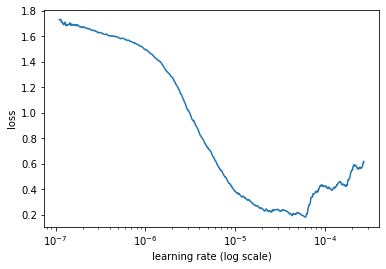

In [21]:
learner.lr_find()
learner.lr_plot()

In [22]:
learner.fit_onecycle(6e-5, 1)



begin training using onecycle policy with max lr of 6e-05...
Train on 6704 samples, validate on 1676 samples
6704/6704 [==============================] - 366s 55ms/sample - loss: 0.3583 - accuracy: 0.8795 - val_loss: 0.0869 - val_accuracy: 0.9732


In [23]:
learner.validate(val_data=(x_test, y_test), class_names=label_columns)

                              precision    recall  f1-score   support

           __label__Lemmikit       0.99      0.99      0.99       338
           __label__Matkailu       0.99      0.95      0.97       326
             __label__Talous       0.95      0.98      0.96       324
            __label__Terveys       0.96      0.99      0.97       340
__label__Urheilu ja kuntoilu       0.98      0.97      0.97       348

                    accuracy                           0.97      1676
                   macro avg       0.97      0.97      0.97      1676
                weighted avg       0.97      0.97      0.97      1676



array([[334,   0,   0,   3,   1],
       [  2, 309,  11,   1,   3],
       [  1,   2, 317,   2,   2],
       [  0,   0,   3, 335,   2],
       [  2,   0,   2,   8, 336]], dtype=int64)

In [24]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [25]:
texts = ["kissat on kivoja","Suomen talous on kuralla, hallitus vaihtoon", "Kuntosalilla käyminen on kivaa, tulee hiki pintaan ja mielikin virkistyy"]
for text in texts:
    print(text)
    prediction = predictor.predict(text)
    print(prediction)

kissat on kivoja


__label__Lemmikit
Suomen talous on kuralla, hallitus vaihtoon


__label__Talous
Kuntosalilla käyminen on kivaa, tulee hiki pintaan ja mielikin virkistyy


__label__Urheilu ja kuntoilu


In [21]:
predictor.save('model/suomi24_5_topic_model_FinBERT')